In [1]:
from IPython.display import YouTubeVideo
# Required imports
import json
import re
import zipfile as zp
import pandas as pd
import numpy as np
import emoji
import random
import pygal
import user_agents
#flask example (example.zip musi być w katalogu głównym)
import sys
sys.path.append('..')
from util import *

In [16]:
# zip_path = "/home/jacek/Pobrane/Okon_Slowacki_30_11_2020.zip"
# zip_path = "/home/jacek/Pobrane/facebook-jacekstasiak75 222.zip"
zip_path = "/home/jacek/Pobrane/facebook-jacekstasiak75.zip"
# zip_path = "/home/jacek/Pobrane/win10 unpacked/facebook-okoń 28-12-20.zip"
# zip_path = "/home/jacek/Pobrane/facebook-janpodkowa98.zip"

data = None
acc_activity = None
with zp.ZipFile(zip_path) as zip:
    data = gen_pandas_table(zip)


In [3]:
# wczytywanie aktywności poza facebookiem

with zp.ZipFile(zip_path) as zip:
    folders = get_structure(zip)
    
    json_fname = None
    for name in folders['ads_and_businesses']['__files']:
#         print(name[0])
        if name[0] == 'your_off-facebook_activity.json':
            json_fname = name[1]
            break
    
    if json_fname:
#         print('json fname')
        names = []
        types = []
        times = []
        with zip.open(json_fname) as f:
            jdata = json.loads(f.read())
            for act in jdata['off_facebook_activity']:
#                 print(act['name'])
                name = act['name']
                for i in act['events']:
                    names.append(name)
                    types.append(i['type'])
                    times.append(i['timestamp'])
            table = pd.DataFrame({'name': names, 'type': types, 'time': times})
            table.time = pd.to_datetime(table.time, unit='s')
            data['off_activity'] = table
        

In [4]:
activ = data['off_activity']
display = None
arrs = [[], [], [], []]
for name, info in activ.groupby(activ.name):
    arrs[0].append(name)
    arrs[1].append(info.name.count())
    arrs[2].append(info.time.min())
    arrs[3].append(info.time.max())
#     print(info.name.count(), name, info.time.min(), info.time.max())
display = pd.DataFrame({'name': arrs[0], 'number of visits': arrs[1], 'first visited': arrs[2], 'last visit': arrs[3]})
display.sort_values('number of visits', ascending=False)[:10]
# display.sort_values('last visit', ascending=False)[:10]

,name,number of visits,first visited,last visit
46,reverso.net,71,2020-12-10 16:39:00,2020-12-18 10:35:00
5,Vinted.pl,54,2020-11-26 19:04:00,2020-12-10 20:08:00
13,diki.pl,17,2020-11-20 21:13:00,2020-12-17 23:37:00
9,baeldung.com,8,2020-12-14 08:49:00,2020-12-19 12:30:00
4,UNO,7,2020-11-17 16:39:00,2020-11-19 14:10:00
38,northeastern.edu,5,2020-12-16 10:27:00,2020-12-16 10:27:00
10,cambridge.org,5,2020-12-13 15:36:00,2020-12-17 22:27:00
41,pluralsight.com,4,2020-12-10 08:31:00,2020-12-16 10:26:00
20,helion.pl,4,2020-12-14 22:29:00,2020-12-15 21:49:00
45,resume.io,3,2020-12-10 16:18:00,2020-12-10 17:31:00


In [5]:
test = ['some', 'data']
test2 = [None, [1, 2]]
df = pd.DataFrame({'test': test, 'test2': test2})
df

,test,test2
0,some,None
1,data,"[1, 2]"


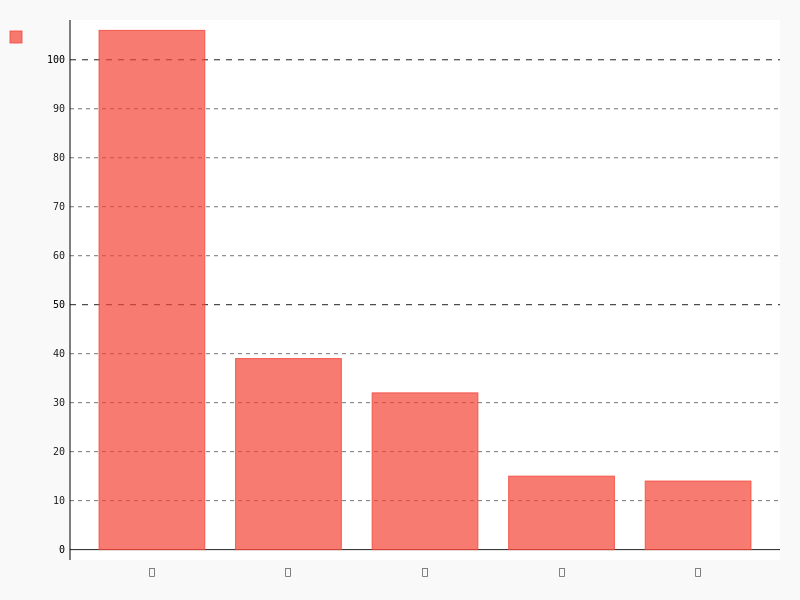

In [24]:
reac = data['reactions']
your_reac = reac[reac.giver == data['username']]
your_reac.groupby(your_reac.reaction).count().giver.sort_values(ascending=False)

your_recived_reac = reac[reac.reciver == data['username']]
your_recived_reac = your_recived_reac.groupby(your_recived_reac.reaction).count().giver.sort_values(ascending=False)

graph1 = pygal.Bar(showlegend=False)
graph1.add('', list(your_recived_reac))
graph1.x_labels = list(your_recived_reac.index)
graph1

graph1 = pygal.Bar(showlegend=False)
graph1.add('', list(your_recived_reac))
graph1.x_labels = list(your_recived_reac.index)
graph1

# reac